<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">

<li><span><a href="#Download resting modules" data-toc-modified-id="Download-resting-modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Download resting modules</a></span></li>
<li><span><a 
href="#Parameter" data-toc-modified-id="Parameter-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parameter</a></span></li>
<li><span><a 
href="#Data cleaning" data-toc-modified-id="Decision-Variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Decision Variables</a></span></li>
<li><span><a 
href="#Objective" data-toc-modified-id="Objective-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Objective</a></span></li>
<li><span><a 
href="#Contraints" data-toc-modified-id="Contraints-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Contraints</a></span></li>
<li><span><a 
href="#Solve-the-Problem" data-toc-modified-id="Solve-the-Problem-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Solve the Problem</a></span></li></ul></div>

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cp "/content/drive/MyDrive/Colab Notebooks/ACTS/rest_client.py" .
%cp "/content/drive/MyDrive/Colab Notebooks/ACTS/project.py" .

In [3]:
import rest_client

server = 'covidscreen.lbl.gov/api'        
username = 'khiga'
password = 'Ky83#c3c'

connection = rest_client.DataConnection(server)#,username,password)

#connection.upload('../acts/test_results.csv','Result')

#connection.upload('../acts/processed_metadata_ieee8023.csv','Source')

#connection.upload('../initial_data/new_meta_w_prev.csv','Source')

In [4]:
#connection.upload('../acts/test_results.csv','Result')

In [5]:
# Get blank form for describing filter queries
source_filter_form = connection.get_filter_form('Source') # connect to table Source, returns dictionary with all fields empty
#result_filter_form = connection.get_filter_form('Result')

# Customize the query form
source_filter_form['sex']['exact'] = 'F'

# Make the request
results = connection.filtered_download('Source',source_filter_form)

#print(connection.get_record_form('Source'))


In [6]:
print(len(results))

441


In [7]:
print(results[1])

{'id': 31, 'source_and_patientid': 'cohen__4', 'sex': 'F', 'age': 52, 'finding': 'Pneumonia/Viral/COVID-19', 'RT_PCR_positive': 'Y', 'survival': '', 'intubated': 'N', 'intubation_present': 'N', 'went_icu': 'N', 'in_icu': 'N', 'needed_supplemental_O2': 'N', 'extubated': '', 'temperature': None, 'pO2_saturation': None, 'leukocyte_count': None, 'neutrophil_count': None, 'lymphocyte_count': None, 'date': 'January 30, 2020', 'location': 'Changhua Christian Hospital, Changhua City, Taiwan', 'format': '', 'image_size': '', 'nersc_file': 'https://covidscreen.lbl.gov/static/nersc/research_paper/reproduce_march_25_2021/data_sets/classification/data/train/nejmc2001573_f1b.jpeg', 'thumbnail_file': 'https://covidscreen.lbl.gov/static/nersc/research_paper/reproduce_march_25_2021/data_sets/classification/thumbs/nejmc2001573_f1b.jpeg', 'results': []}


In [8]:
form=connection.get_filter_form('Source')
form['RT_PCR_positive']['exact'] = 'Y'
results=connection.filtered_download('Source',form)
print(len(results))

189


In [9]:
for i in results:
  if (i == 'pneumonia'):
    print(i)

In [10]:
#Get list filenames
listpic = []
for i,rec in enumerate(results):
  listpic.append(rec['nersc_file'])


In [11]:
import numpy as np
pic9 = np.random.random_integers(1,len(results),9)
pic9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 189 + 1) instead
  


array([109,  39, 111,  91,  17,  56, 100, 178, 187])

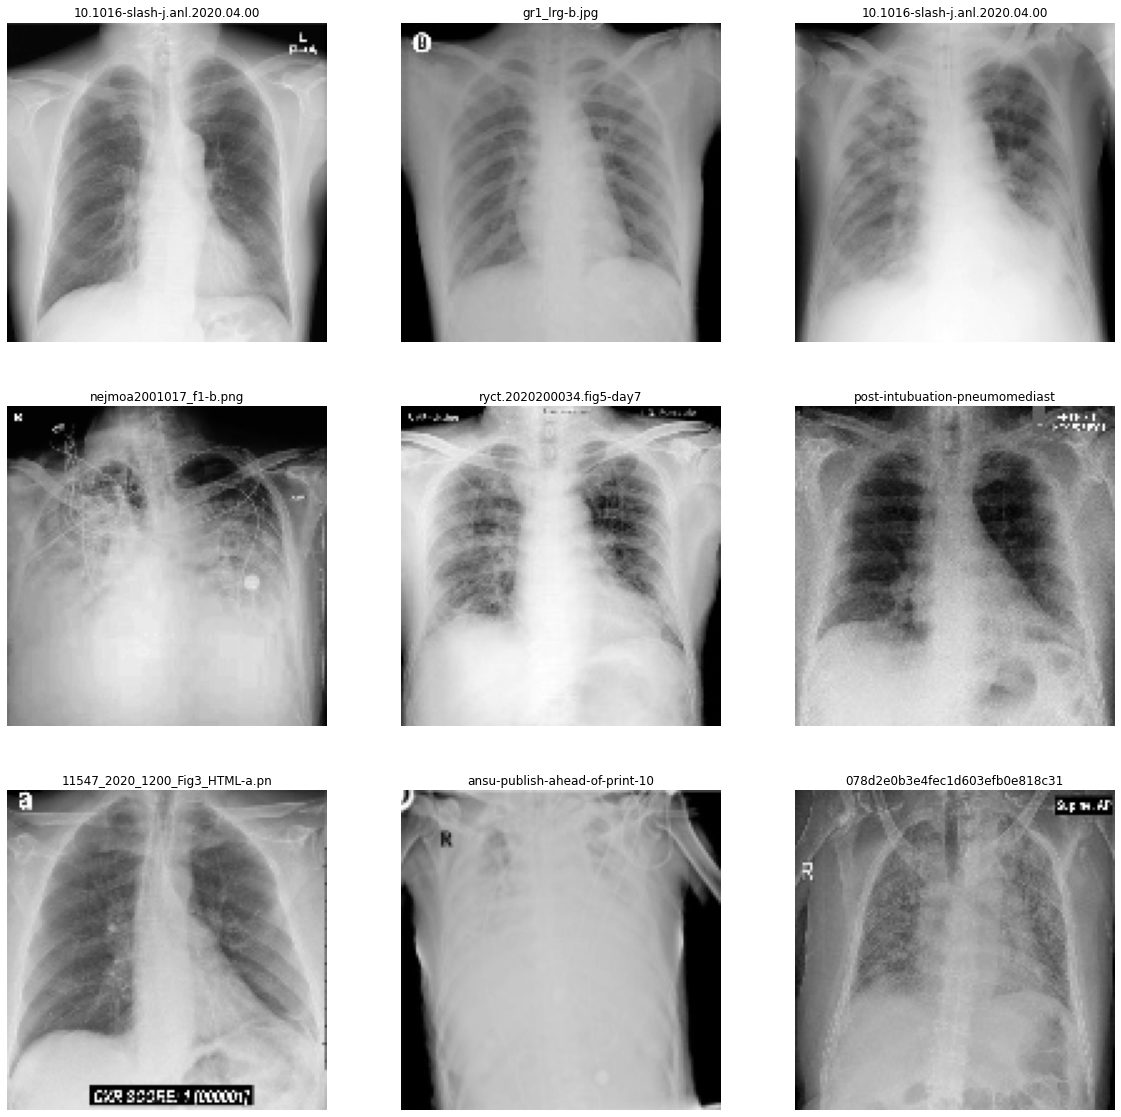

In [12]:
 '''Create montage 3x3 that fits a Letter-page'''
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
from skimage import io
#img = data.coins()[::3,::3]
#islices = np.arange(0,self.nslices-1,delta)
#islices = islices[0:9].astype(int)
for i,ipic9 in enumerate(pic9):
    filepath = results[ipic9]['thumbnail_file']#['nersc_file']
    img = io.imread(filepath)
    #im_filt = self.enhanceSlicep(im_filt[::downsample,::downsample]) #raw image
    xy = np.unravel_index(i, (3,3))
    axes[xy].imshow(img,cmap='gray')
    f=filepath.split(sep='.jpeg')
    f=f[0].split(sep='/')
    title = f[-1][0:30]
    axes[xy].set_title(title)
    axes[xy].set_axis_off()
    #fig.subplots_adjust( wspace = -0.1,  hspace = 0.1 )    

In [ ]:
listImg =[]
for i in np.arange(len(results)):
    filepath = results[i]['thumbnail_file']#['nersc_file']
    listImg.append(io.imread(filepath))

In [ ]:
from ipywidgets import interact,IntSlider

In [ ]:
def slicing(ic,lut='gray'):
    '''Play individual slices within the stack downsampling by ndown'''
    def slicer(z):
        #aSlice = exposure.equalize_hist(self.ic[z])
        aSlice = (ic[z])
        if((aSlice.shape[0]/100>2) & (aSlice.shape[1]/100>2)):
            ndown = 10            
        else:
            ndown = 1
        plt.imshow(aSlice[::ndown,::ndown],cmap=lut) #without vmin/vmax = dynamic :(
        plt.axis('off')
    interact(slicer, z=IntSlider(min=0,max=len(ic)-1,step=1,value=len(ic)//2));   

In [ ]:
slicing(listImg)

interactive(children=(IntSlider(value=220, description='z', max=440), Output()), _dom_classes=('widget-interac…

In [ ]:
result_filter_form = connection.get_filter_form('Result')
print(result_filter_form)

{'lung_intact_file': {'exact': None, 'in': [], 'istartswith': '', 'icontains': '', 'iendswith': '', 'iregex': '', 'search': ''}, 'lung_intact_prediction': {'exact': None, 'in': [], 'istartswith': '', 'icontains': '', 'iendswith': '', 'iregex': '', 'search': ''}, 'lung_removed_file': {'exact': None, 'in': [], 'istartswith': '', 'icontains': '', 'iendswith': '', 'iregex': '', 'search': ''}, 'lung_removed_prediction': {'exact': None, 'in': [], 'istartswith': '', 'icontains': '', 'iendswith': '', 'iregex': '', 'search': ''}, 'label': {'exact': None, 'in': [], 'istartswith': '', 'icontains': '', 'iendswith': '', 'iregex': '', 'search': ''}, 'fold': {'isnull': None, 'exact': None, 'gte': None, 'lte': None}, 'source': {}, 'id': {'exact': None, 'in': []}}


{'lung_intact_file': {'exact': None, 'in': [], 'istartswith': '', 'icontains': '', 'iendswith': '', 'iregex': '', 'search': ''}, 'lung_intact_prediction': {'exact': None, 'in': [], 'istartswith': '', 'icontains': '', 'iendswith': '', 'iregex': '', 'search': ''}, 'lung_removed_file': {'exact': None, 'in': [], 'istartswith': '', 'icontains': '', 'iendswith': '', 'iregex': '', 'search': ''}, 'lung_removed_prediction': {'exact': None, 'in': [], 'istartswith': '', 'icontains': '', 'iendswith': '', 'iregex': '', 'search': ''}, 'label': {'exact': None, 'in': [], 'istartswith': '', 'icontains': '', 'iendswith': '', 'iregex': '', 'search': ''}, 'fold': {'isnull': None, 'exact': None, 'gte': None, 'lte': None}, 'source': {}, 'id': {'exact': None, 'in': []}}

In [ ]:

# Customize the query form
result_filter_form['lung_intact_prediction']['exact']='pneumonia'

# Make the request
results = connection.filtered_download('Result',result_filter_form)

In [ ]:
results

[{'fold': 0,
  'id': 1,
  'label': 'pneumonia',
  'lung_intact_file': '',
  'lung_intact_prediction': 'pneumonia',
  'lung_removed_file': '',
  'lung_removed_prediction': 'pneumonia',
  'source': 'http://covidscreen.lbl.gov/api/source/1655/'},
 {'fold': 0,
  'id': 2,
  'label': 'pneumonia',
  'lung_intact_file': '',
  'lung_intact_prediction': 'pneumonia',
  'lung_removed_file': '',
  'lung_removed_prediction': 'pneumonia',
  'source': 'http://covidscreen.lbl.gov/api/source/1764/'},
 {'fold': 0,
  'id': 6,
  'label': 'pneumonia',
  'lung_intact_file': '',
  'lung_intact_prediction': 'pneumonia',
  'lung_removed_file': '',
  'lung_removed_prediction': 'pneumonia',
  'source': 'http://covidscreen.lbl.gov/api/source/2723/'},
 {'fold': 0,
  'id': 8,
  'label': 'pneumonia',
  'lung_intact_file': '',
  'lung_intact_prediction': 'pneumonia',
  'lung_removed_file': '',
  'lung_removed_prediction': 'pneumonia',
  'source': 'http://covidscreen.lbl.gov/api/source/3385/'},
 {'fold': 0,
  'id': 9,


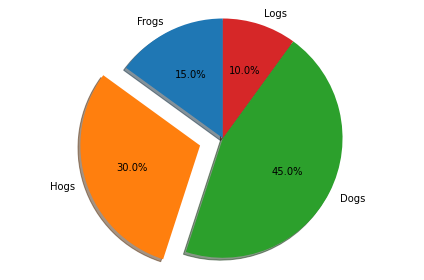

In [ ]:
# Pie chart
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.2, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [ ]:
# Make the request
results = connection.filtered_download('Source',source_filter_form) #returns a list of dictionaries

print(results)
#print(connection.get_record_form('Source'))


[{'id': 5, 'patientid': '4', 'offset': 0, 'sex': 'F', 'age': 52, 'finding': 'Pneumonia/Viral/COVID-19', 'RT_PCR_positive': 'Y', 'survival': '', 'intubated': 'N', 'intubation_present': 'N', 'went_icu': 'N', 'in_icu': 'N', 'needed_supplemental_O2': 'N', 'extubated': '', 'temperature': None, 'pO2_saturation': None, 'leukocyte_count': None, 'neutrophil_count': None, 'lymphocyte_count': None, 'view': 'PA', 'modality': 'X-ray', 'date': 'January 25, 2020', 'location': 'Changhua Christian Hospital, Changhua City, Taiwan', 'folder': 'images', 'filename': 'nejmc2001573_f1a.jpeg', 'doi': '10.1056/NEJMc2001573', 'url': 'https://www.nejm.org/doi/full/10.1056/NEJMc2001573', 'license': '', 'clinical_notes': 'diffuse infiltrates in the bilateral lower lungs', 'other_notes': '', 'img_path': '/global/project/projectdirs/m3670/CXR/research_paper/reproduce_march_25_2021/data_sources/covid-chestxray-dataset/images/nejmc2001573_f1a.jpeg', 'seg_path': '/global/project/projectdirs/m3670/CXR/research_paper/rep

In [ ]:
len(results)

740

In [ ]:
#Query: how many sex=F are there in the database?
women = next((item for item in results if item["sex"] == "F"), None)
len(women)

35

In [ ]:
men = next((item for item in results if item["sex"] == "M"), None)
len(men)

35

In [ ]:
#Query: from sex=F, randomly select one of the CXR path and show image

In [ ]:
#Query: are there patients with same id?